In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

/var/folders/gn/wh8n5ypx5036n6rxw1l4s64m0000gn/T/ipykernel_6004/1207202026.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Import csv
fg_index_btc = pd.read_csv("C:/Users/Werner Soon Shi Xu/Downloads/dataset.csv")
eth_data = pd.read_csv("C:/Users/Werner Soon Shi Xu/Downloads/Ethereum Historical Data6.csv")

merged_df = pd.merge(fg_index_btc, eth_data, on='Date')

fg_index_btc.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Werner Soon Shi Xu/Downloads/dataset.csv'

In [ ]:
eth_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,08/04/2024,"3,569.99","3,454.17","3,571.52","3,409.58",310.77K,3.35
1,07/04/2024,"3,454.17","3,351.99","3,459.43","3,344.89",217.80K,3.05
2,06/04/2024,"3,352.03","3,317.84","3,394.80","3,307.23",190.08K,1.03
3,05/04/2024,"3,317.84","3,327.45","3,344.17","3,212.89",359.70K,-0.29
4,04/04/2024,"3,327.45","3,310.82","3,435.57","3,254.31",371.23K,0.51


In [ ]:
merged_df.head()

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume,Price,Open,High,Low,Vol.,Change %
0,01/02/2018,30.0,Fear,9170.540039,9.959400e+09,"1,033.55","1,118.15","1,157.09",970.42,1.76M,-7.56
1,02/02/2018,15.0,Extreme Fear,8830.750000,1.272690e+10,920.85,"1,033.02","1,036.17",766.82,3.03M,-10.90
2,03/02/2018,40.0,Fear,9174.910156,7.263790e+09,971.49,920.93,997.51,850.38,1.07M,5.50
3,04/02/2018,24.0,Extreme Fear,8277.009766,7.073550e+09,829.43,971.49,972.66,788.79,1.34M,-14.62
4,05/02/2018,11.0,Extreme Fear,6955.270020,9.285290e+09,696.86,828.49,859.72,634.64,2.99M,-15.98


<Axes: >

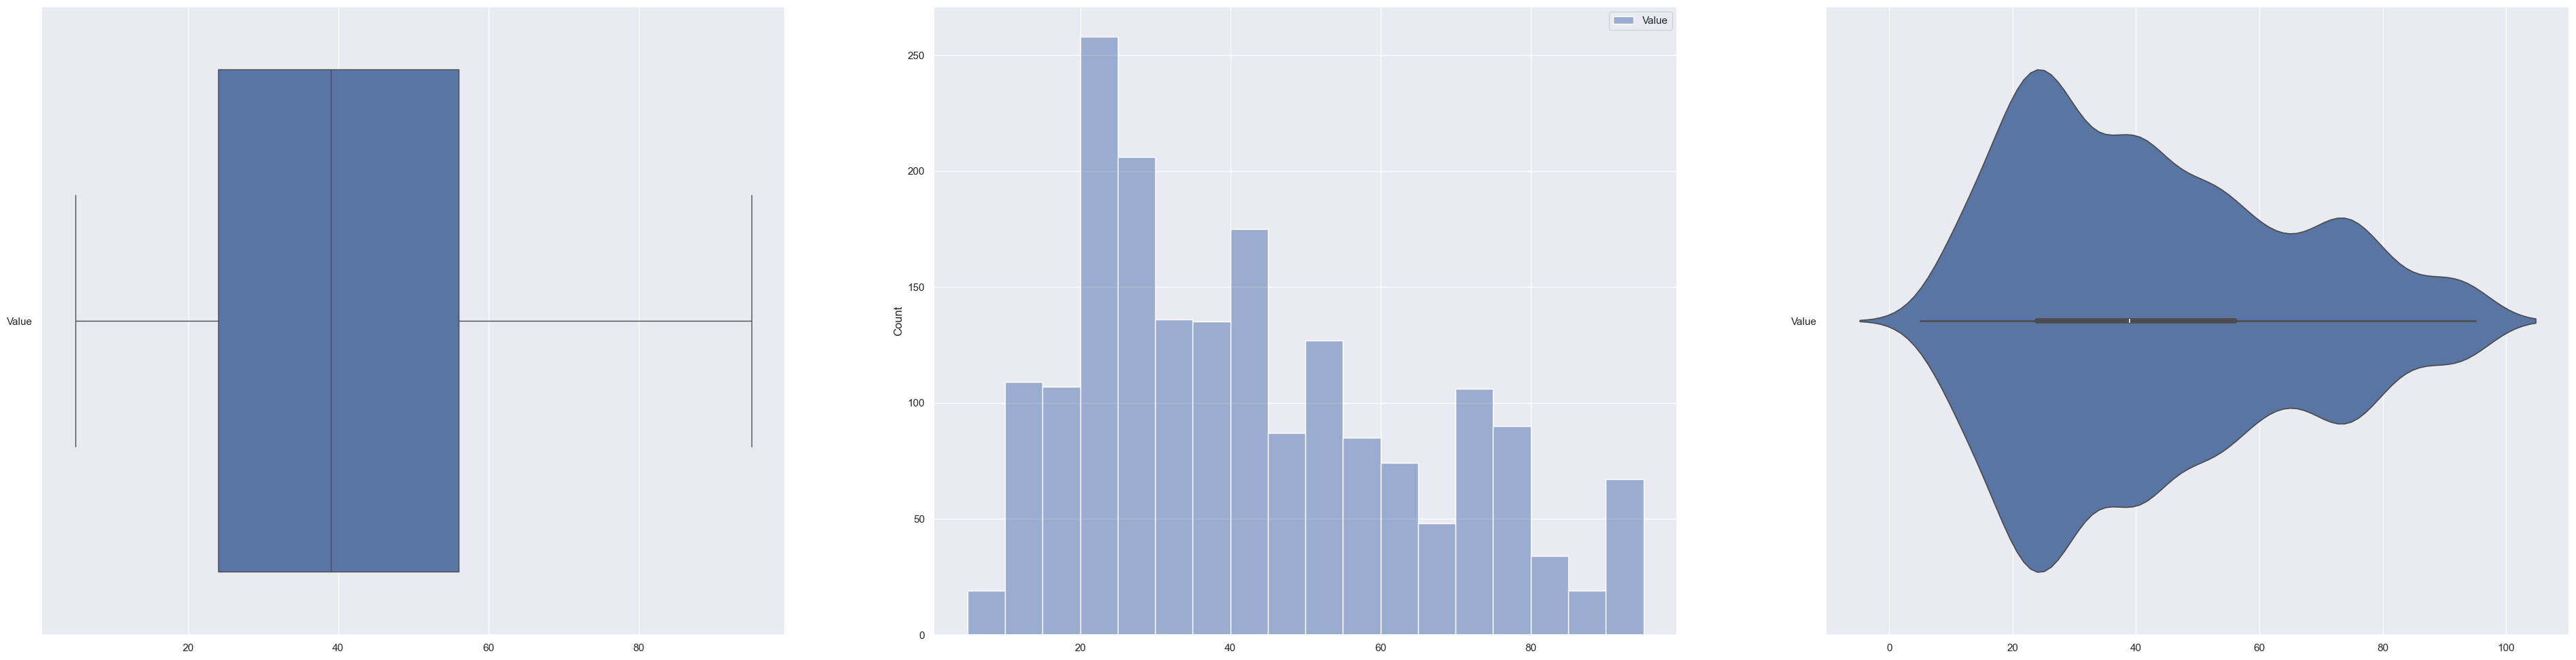

In [ ]:
#Plot boxplot, histplot, violinplot
fear = pd.DataFrame(merged_df['Value'])

change_pri = pd.DataFrame(merged_df['Change %'])

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(48, 12))

# Plot the basic uni-variate figures for neg
sb.boxplot(data = fear, orient = "h", ax = axes[0])
sb.histplot(data = fear, ax = axes[1])
sb.violinplot(data = fear, orient = "h", ax = axes[2])


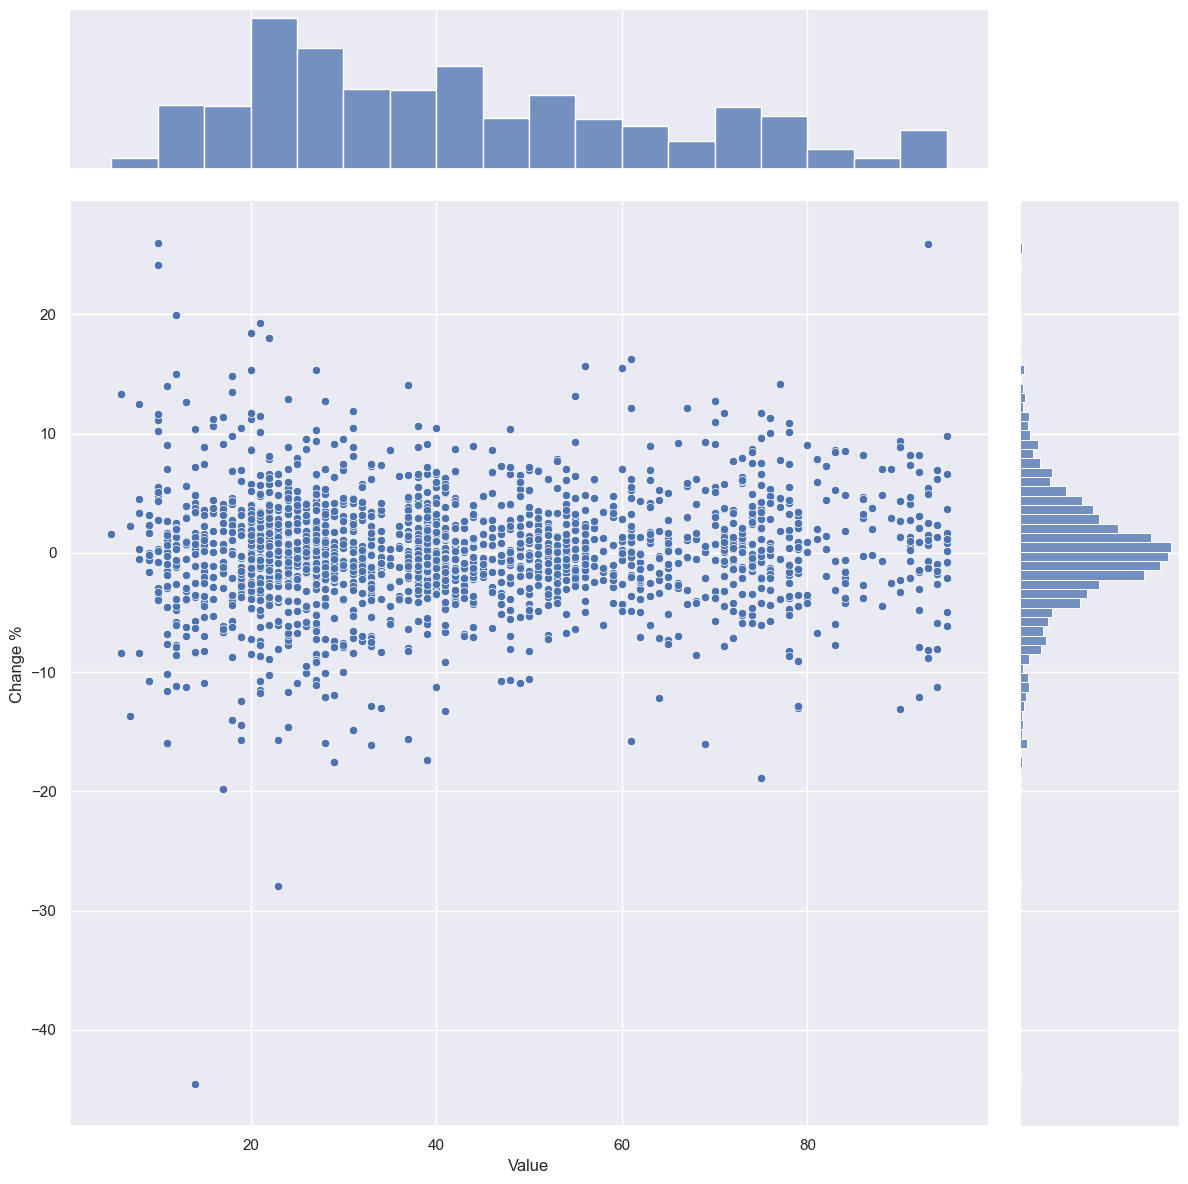

In [ ]:
#Plot Avg. Compound against Change in Price %
trainDF = pd.concat([fear, change_pri], axis = 1).reindex(fear.index)

sb.jointplot(data = trainDF, x = "Value", y = "Change %", height = 12)

<Axes: >

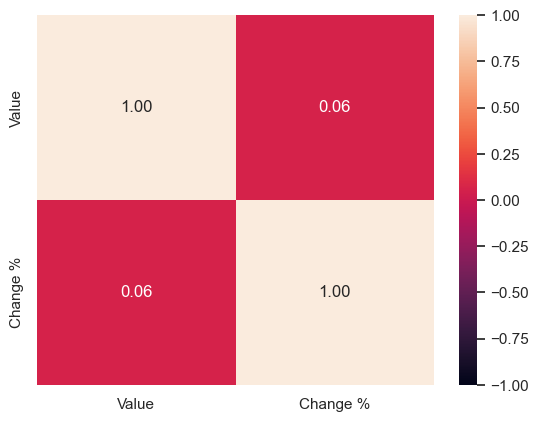

In [ ]:
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [ ]:
# Create a boolean mask to identify rows with classification of "Fear", "Greed", or "Neutral"
mask = merged_df['Value_Classification'].isin(['Fear', 'Greed', 'Neutral'])

# Invert the mask to keep rows where classification is not "Fear", "Greed", or "Neutral"
filtered_df = merged_df[~mask]

filtered_df.head()

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume,Price,Open,High,Low,Vol.,Change %
1,02/02/2018,15.0,Extreme Fear,8830.750000,1.272690e+10,920.85,"1,033.02","1,036.17",766.82,3.03M,-10.90
3,04/02/2018,24.0,Extreme Fear,8277.009766,7.073550e+09,829.43,971.49,972.66,788.79,1.34M,-14.62
4,05/02/2018,11.0,Extreme Fear,6955.270020,9.285290e+09,696.86,828.49,859.72,634.64,2.99M,-15.98
5,06/02/2018,8.0,Extreme Fear,7754.000000,1.399980e+10,783.83,696.75,797.94,568.78,4.29M,12.48
54,27/03/2018,24.0,Extreme Fear,7833.040039,5.378250e+09,448.48,485.97,491.77,446.7,1.31M,-7.72


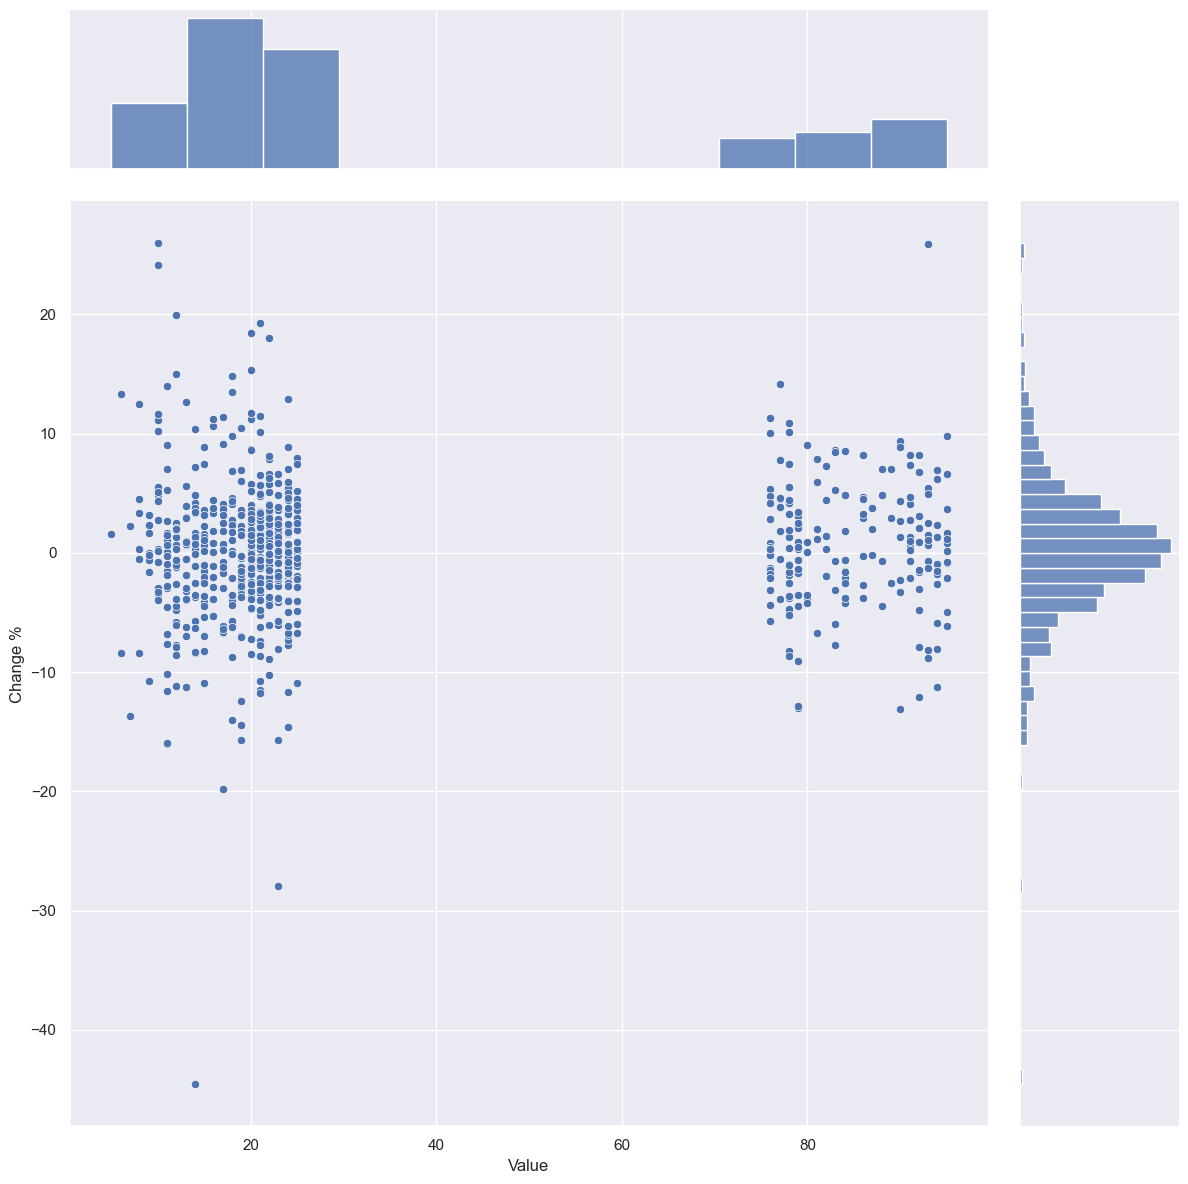

In [ ]:
#Plot boxplot, histplot, violinplot
fear2 = pd.DataFrame(filtered_df['Value'])

change_pri2 = pd.DataFrame(filtered_df['Change %'])

#Plot Avg. Compound against Change in Price %
trainDF2 = pd.concat([fear2, change_pri2], axis = 1).reindex(fear2.index)

sb.jointplot(data = trainDF2, x = "Value", y = "Change %", height = 12)

<Axes: >

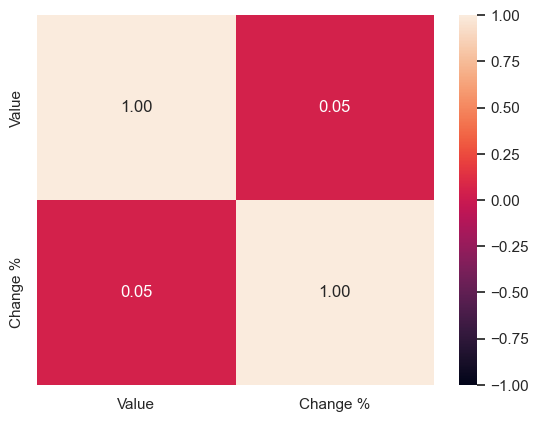

In [ ]:
sb.heatmap(trainDF2.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")